In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('cleaned_data.csv')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


### **CSV files do not preserve data types, so after reloading the cleaned dataset, I explicitly reconverted key columns such as dates and numerical fields.**

In [ ]:
df = df.convert_dtypes()

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=False)
df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst=False)

In [ ]:
df.dtypes

,0
Row ID,Int64
Order ID,string[python]
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,string[python]
Customer ID,string[python]
Customer Name,string[python]
Segment,string[python]
Country,string[python]
City,string[python]


In [ ]:
df.shape

(9800, 18)

In [ ]:
df.columns.str.lower()

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   Int64         
 1   Order ID       9800 non-null   string        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   string        
 5   Customer ID    9800 non-null   string        
 6   Customer Name  9800 non-null   string        
 7   Segment        9800 non-null   string        
 8   Country        9800 non-null   string        
 9   City           9800 non-null   string        
 10  State          9800 non-null   string        
 11  Postal Code    9800 non-null   Int64         
 12  Region         9800 non-null   string        
 13  Product ID     9800 non-null   string        
 14  Category       9800 non-null   string        
 15  Sub-Category   9800 n

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.0,9800,9800,9800.0,9800.0
mean,4900.5,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55211.279796,230.769036
min,1.0,2015-01-03 00:00:00,2015-01-07 00:00:00,-1.0,0.44
25%,2450.75,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.0,17.25
50%,4900.5,2017-06-26 00:00:00,2017-06-29 00:00:00,57551.0,54.49
75%,7350.25,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.0,210.605
max,9800.0,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.0,22638.48
std,2829.160653,NaN,NaN,32076.679886,626.651878


In [ ]:
max_date = df['Order Date'].max()

In [ ]:
max_date

Timestamp('2018-12-30 00:00:00')

### *What is the total sales?*

In [ ]:
total_sales = df['Sales'].sum()

### **Total sales are 2261536.55,indicating overall business performance**

In [ ]:
total_sales

np.float64(2261536.55)

### *Which are the top 5 products by sales?*

In [ ]:
Top5 = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

### **Group all products,caluclate total sales for each,sort them in descending order,and retrieve top 5**

In [ ]:
Top5

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.83
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.38
Cisco TelePresence System EX90 Videoconferencing Unit,22638.48
HON 5400 Series Task Chairs for Big and Tall,21870.57
GBC DocuBind TL300 Electric Binding System,19823.47


<Axes: title={'center': 'Top 5 products by sales'}, xlabel='Product Name'>

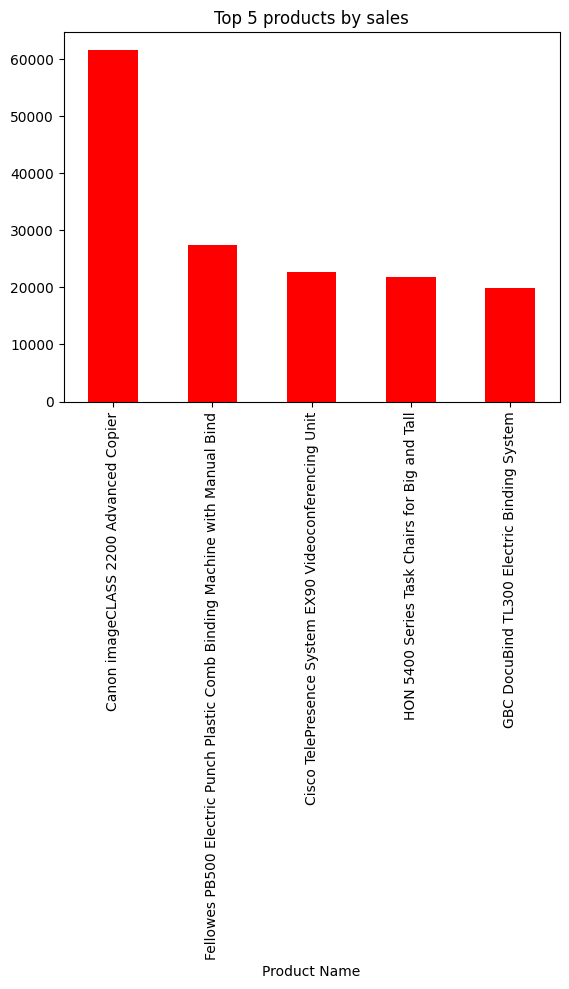

In [ ]:
Top5.plot(kind = 'bar',title = 'Top 5 products by sales',color = 'red')

### *Which Category genarates the highest sales?*

In [ ]:
Top_5Categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(5)

### **Technology strikes high in total sales by category**

In [ ]:
Top_5Categories

,Sales
Category,
Technology,827455.86
Furniture,728658.5
Office Supplies,705422.19


<Axes: title={'center': 'sales by category'}, xlabel='Category'>

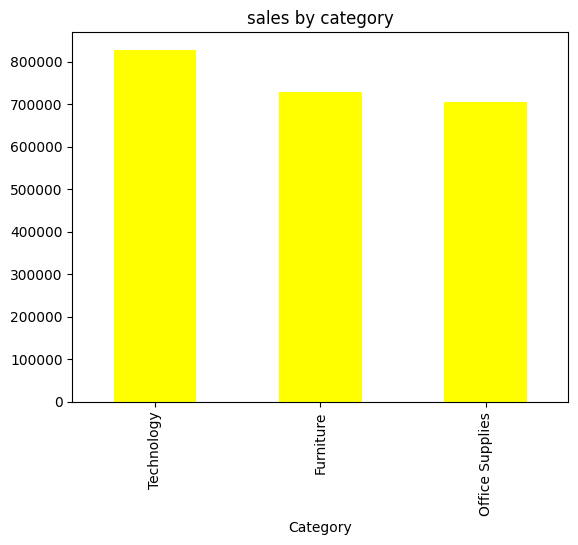

In [ ]:
Top_5Categories.plot(kind = 'bar',title = 'sales by category',color = 'yellow')

### *How do sales vary over time(Monthly trend)?*

*   List item
*   List item



In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
Monthly_sales = df.groupby('Month')['Sales'].sum()

### **Sales show a clear monthly trend with peaks during certain months, indicating seasonal demand.**

In [ ]:
Monthly_sales

,Sales
Month,
2015-01,14205.71
2015-02,4519.92
2015-03,55205.81
2015-04,27906.86
2015-05,23644.29
2015-06,34322.92
2015-07,33781.52
2015-08,27117.53
2015-09,81623.5


<Axes: title={'center': 'Monthly sales trend'}, xlabel='Month'>

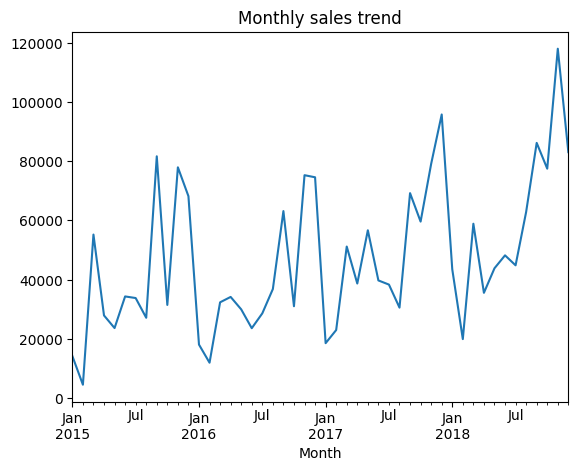

In [ ]:
Monthly_sales.plot(kind='line',title = 'Monthly sales trend')

### *Which region can did best performance?*

In [ ]:
Best_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

### **The West is the Big giant in sales by region among them.**

In [ ]:
Best_region

,Sales
Region,
West,710219.6
East,669518.79
Central,492646.78
South,389151.38


<Axes: title={'center': 'sales by region'}, ylabel='Region'>

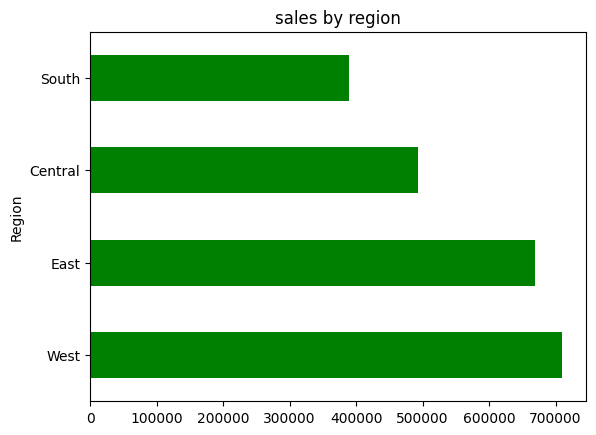

In [ ]:
Best_region.plot(kind = 'barh',title = 'sales by region',color = 'green')